In [76]:
library(devtools)
setwd("/app/diabetes")
load_all()

ERROR: Error: ‘roxygen2’ >= 5.0.0 must be installed for this functionality.


In [57]:
df <- filter_events(read_diabetes(base='../private/diabetes'))
df$ts <- as_POSIX(df$date, df$time)
flog.info("Removing %s bad timestamps", length(which(is.na(df$ts))))
df <- df[!is.na(df$ts),]
flog.info("Final size is %s rows", nrow(df))

INFO [2018-06-13 17:32:44] Loading file ../private/diabetes/data-01
INFO [2018-06-13 17:32:44] Loading file ../private/diabetes/data-03
INFO [2018-06-13 17:32:44] Loading file ../private/diabetes/data-04
INFO [2018-06-13 17:32:44] Loading file ../private/diabetes/data-05
INFO [2018-06-13 17:32:44] Loading file ../private/diabetes/data-06
INFO [2018-06-13 17:32:44] Loading file ../private/diabetes/data-07
INFO [2018-06-13 17:32:44] Loading file ../private/diabetes/data-08
INFO [2018-06-13 17:32:44] Loading file ../private/diabetes/data-09
INFO [2018-06-13 17:32:44] Loading file ../private/diabetes/data-10
INFO [2018-06-13 17:32:44] Loading file ../private/diabetes/data-11
INFO [2018-06-13 17:32:44] Loading file ../private/diabetes/data-12
INFO [2018-06-13 17:32:44] Loading file ../private/diabetes/data-13
INFO [2018-06-13 17:32:44] Loading file ../private/diabetes/data-14
INFO [2018-06-13 17:32:44] Loading file ../private/diabetes/data-15
INFO [2018-06-13 17:32:44] Loading file ../priva

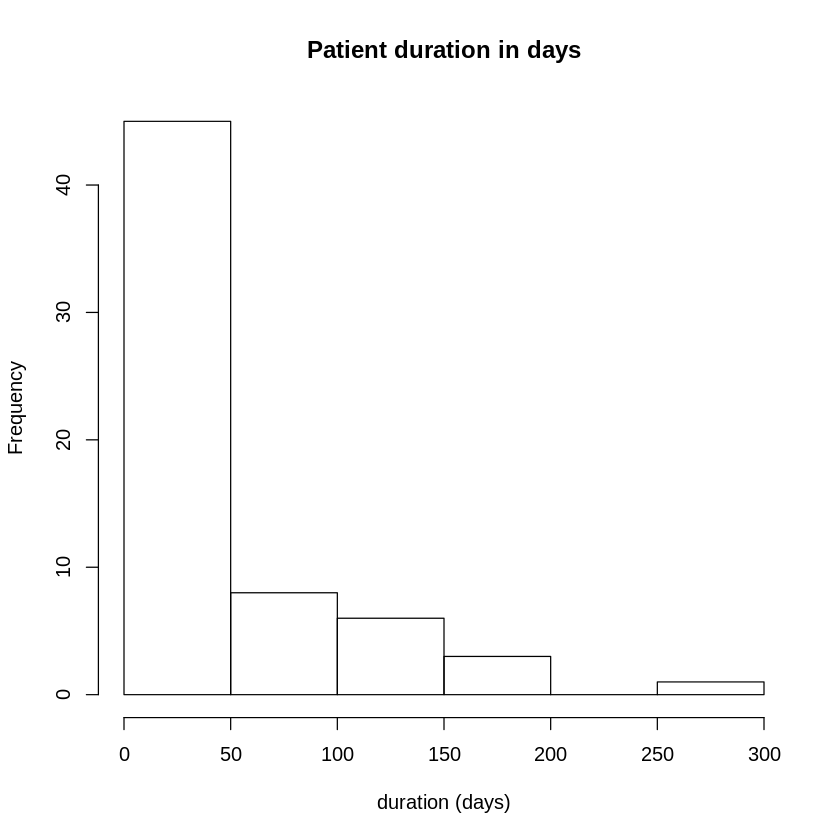

In [15]:
plot_patient_duration(get_patient_duration(df))

How many events does each feature have?

In [18]:
table(df$feature)


  33   34   58   60   62 
8274 3552 3156 2403 2793 

Examine which partipants have sufficient data to analyze

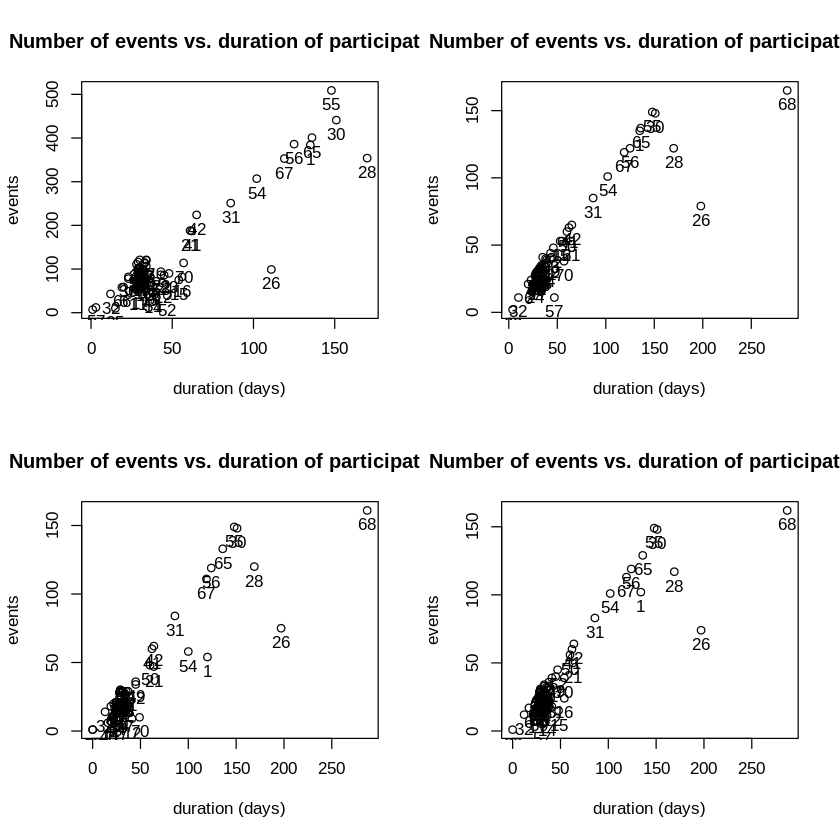

In [40]:
opar <- par(mfrow=c(2,2))
plot_duration_vs_events(df, 33)
plot_duration_vs_events(df, 58)
plot_duration_vs_events(df, 60)
plot_duration_vs_events(df, 62)
par(opar)

Omit 26, 52, 57. Look at 68, 30, 55

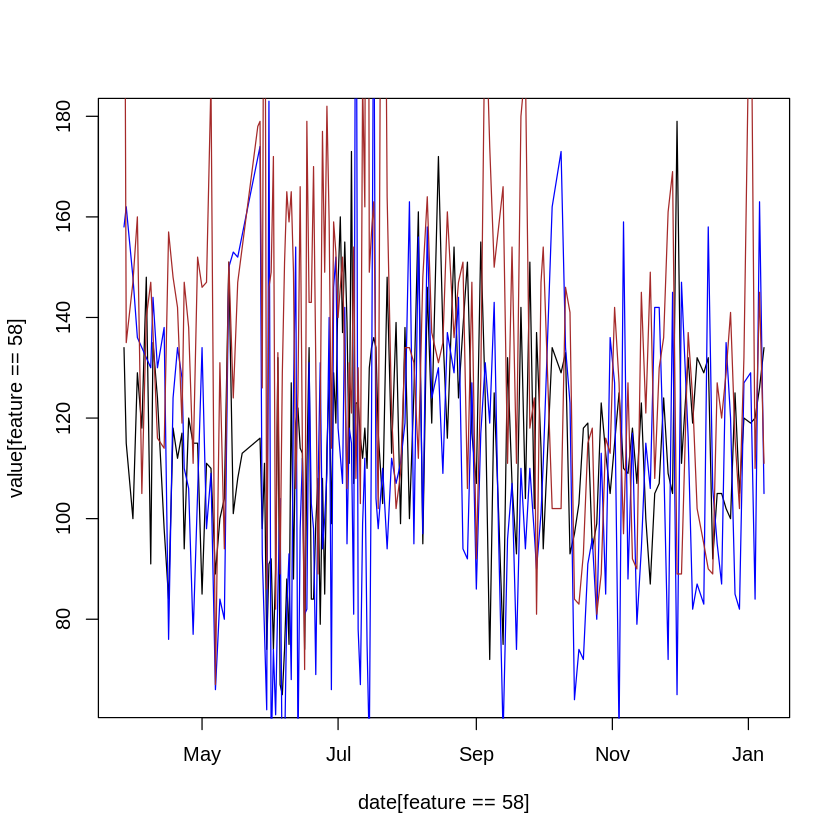

In [80]:
with(df[df$id==68,], {
     plot(date[feature==58], value[feature==58], type='l')
     lines(date[feature==60], value[feature==60], col='blue')
     lines(date[feature==62], value[feature==62], col='brown')
})

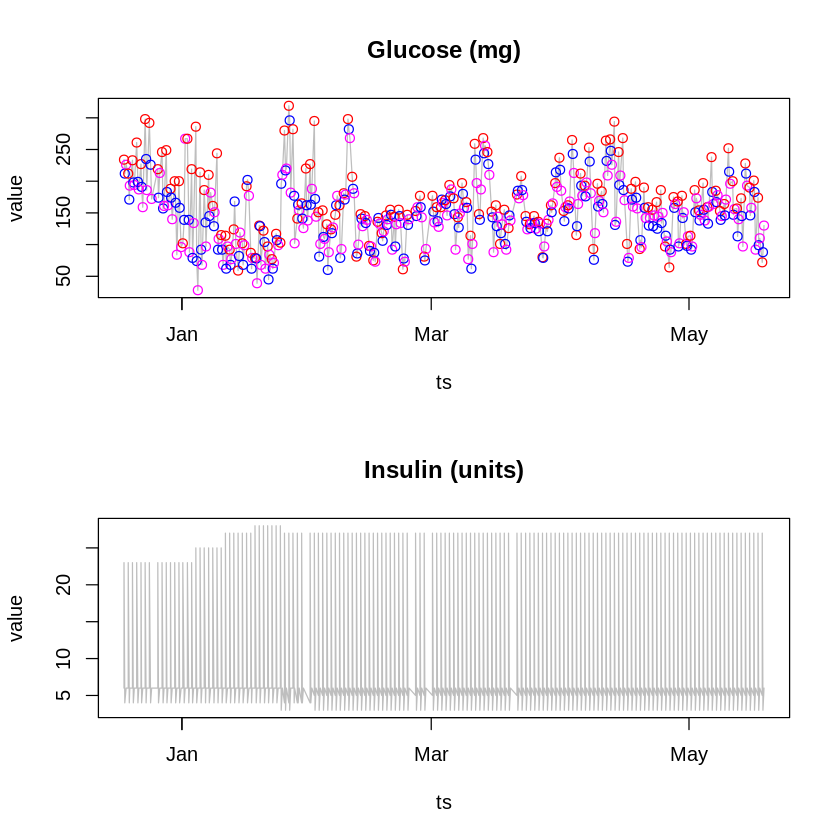

In [91]:
plot_glucose_and_insulin(df, 30)

In [85]:
range(df$ts[df$id==68])

[1] "1988-03-27 08:00:00 UTC" "1989-01-08 18:00:00 UTC"